Linear Regression
Amazon_cloths sells cloths online. Customers come in to the store, have meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Following is predict is analysis for this company

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# "C:\Users\nisha\Downloads\Ecommerce Customers.txt"
customers = pd.read_csv("C:/Users/nisha/Desktop/myFolder/Learning/DataScience/python/pythonPracticals/pythonbyRandhwirSir/mlProject/Ecommerce Customers.txt")
customers.head()
customers.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
customers.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
customers.style.set_table_styles(
    [
        {'selector': 'th:only-of-type', 'props': [('vertical-align', 'middle')]},
        {'selector': 'th', 'props': [('vertical-align', 'top')]},
        {'selector': 'thead th', 'props': [('text-align', 'right')]}
    ]
)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC 99414-7564",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37242-1057",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611 Jeffreychester, MN 67218-7250",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692 Josephbury, WV 92213-0247",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980 DPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key West Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255 APO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Data Analysis


In [9]:
customers['Time on Website'] > 30

0      True
1      True
2      True
3      True
4      True
       ... 
495    True
496    True
497    True
498    True
499    True
Name: Time on Website, Length: 500, dtype: bool

In [8]:
customers['Yearly Amount Spent']

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [12]:
customers.notnull()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
495,True,True,True,True,True,True,True,True
496,True,True,True,True,True,True,True,True
497,True,True,True,True,True,True,True,True
498,True,True,True,True,True,True,True,True


In [11]:
# Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns


In [9]:
customers['Time on Website' ],customers['Yearly Amount Spent']

(0      39.577668
 1      37.268959
 2      37.110597
 3      36.721283
 4      37.536653
          ...    
 495    36.417985
 496    37.190268
 497    38.332576
 498    36.840086
 499    35.771016
 Name: Time on Website, Length: 500, dtype: float64,
 0      587.951054
 1      392.204933
 2      487.547505
 3      581.852344
 4      599.406092
           ...    
 495    573.847438
 496    529.049004
 497    551.620145
 498    456.469510
 499    497.778642
 Name: Yearly Amount Spent, Length: 500, dtype: float64)

In [18]:
sns.jointplot(customers['Time on Website' ],customers['Yearly Amount Spent'])

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 were given

In [21]:
sns.jointplot(customers['Time on Website' ],customers['Yearly Amount Spent'])

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 were given

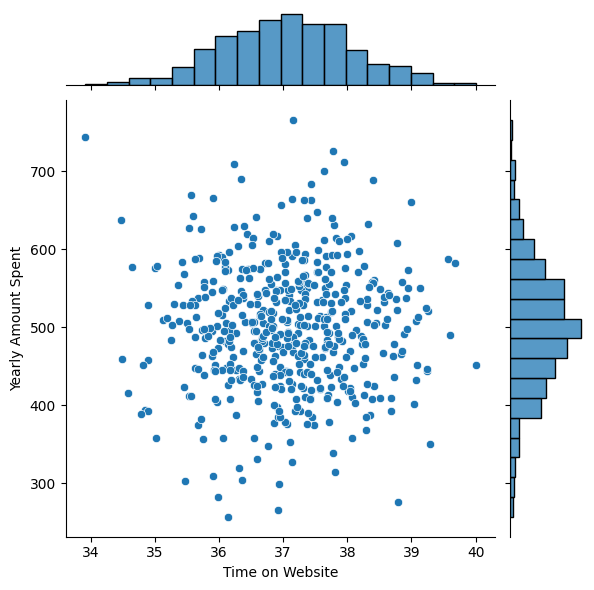

In [12]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

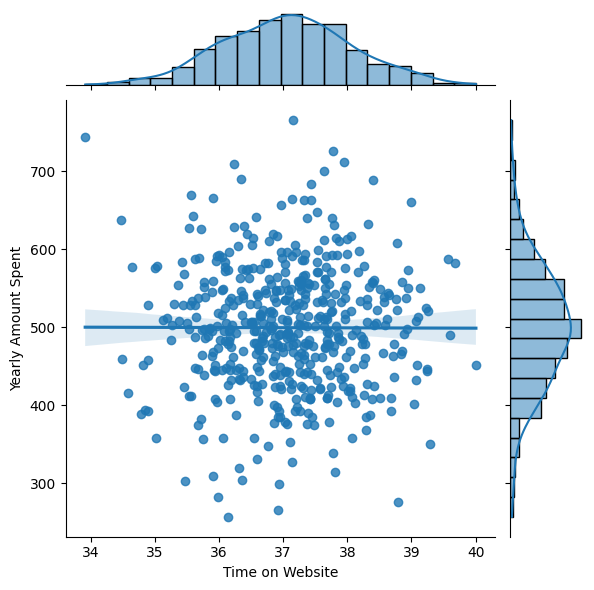

In [13]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, kind='reg')


In [14]:
<seaborn.axisgrid.JointGrid at 0x1a15a46c18>

SyntaxError: invalid syntax (1097501246.py, line 1)

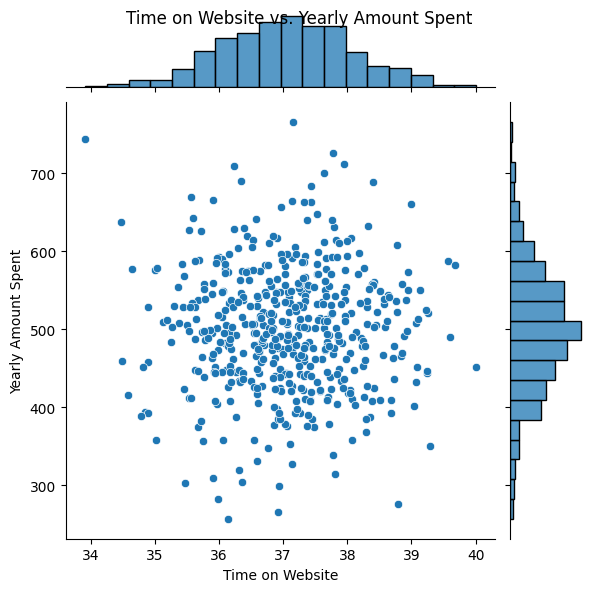

In [15]:
# Create the jointplot (returns a JointGrid object)
joint_grid = sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

# Customize the plot, for example adding a title
joint_grid.fig.suptitle('Time on Website vs. Yearly Amount Spent')

# Display the plot
plt.show()

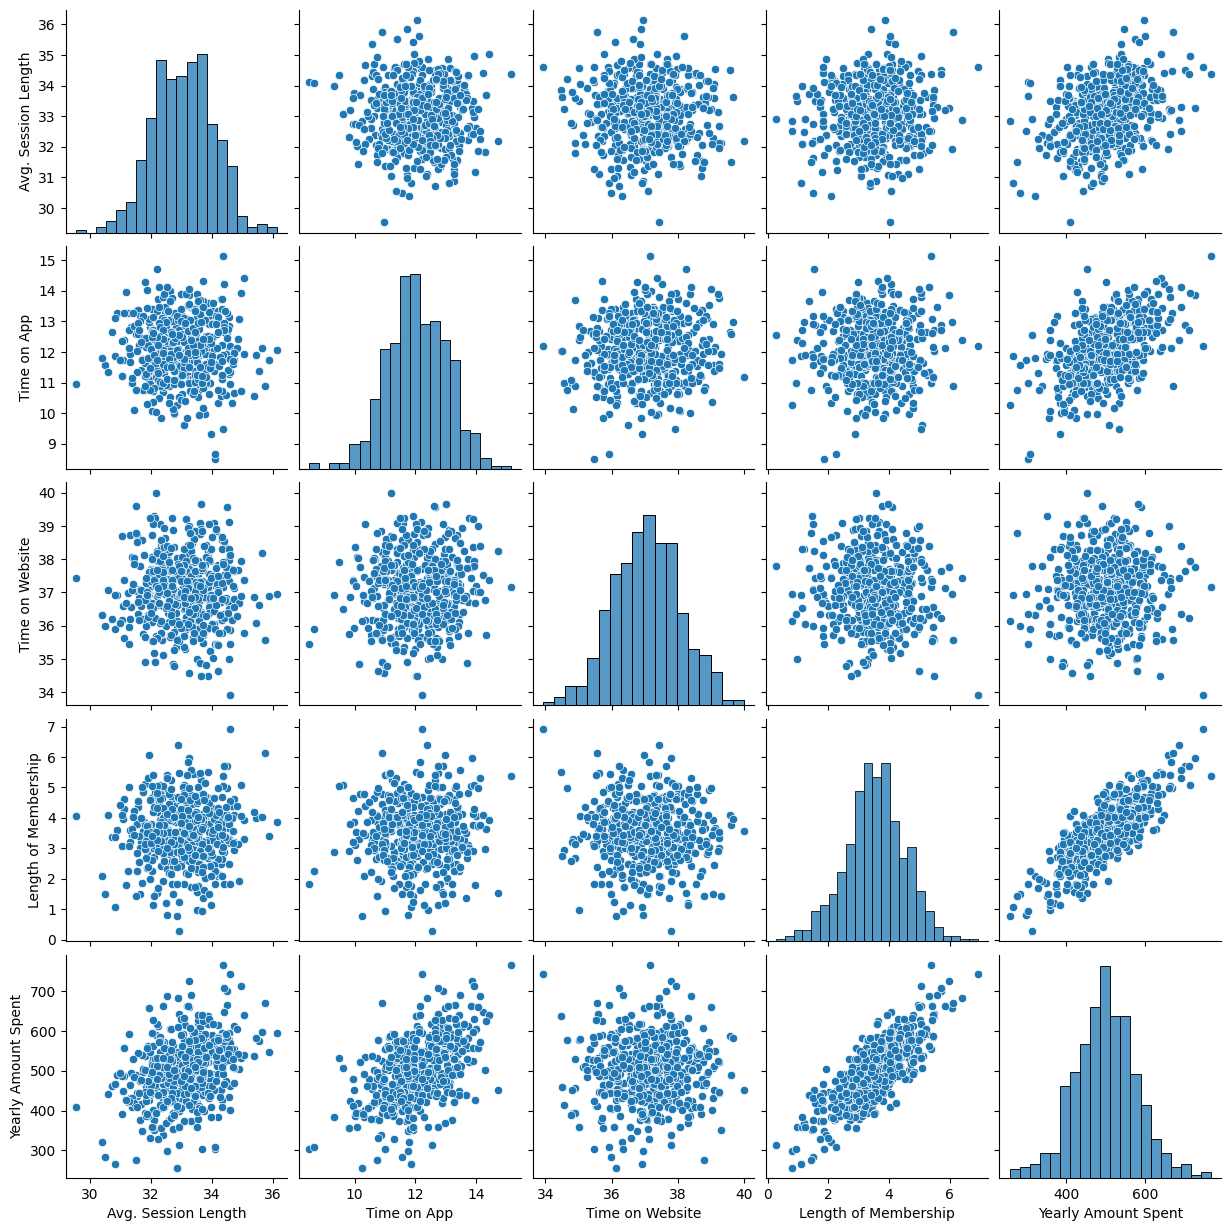

In [16]:
sns.pairplot(customers)

sns.PairGrid() to visualize relationships between multiple pairs of variables. The PairGrid object offers detailed control over how these plots are displayed.

In [27]:
<seaborn.axisgrid.PairGrid at 0x1a1e8218d0>

SyntaxError: invalid syntax (1098611319.py, line 1)

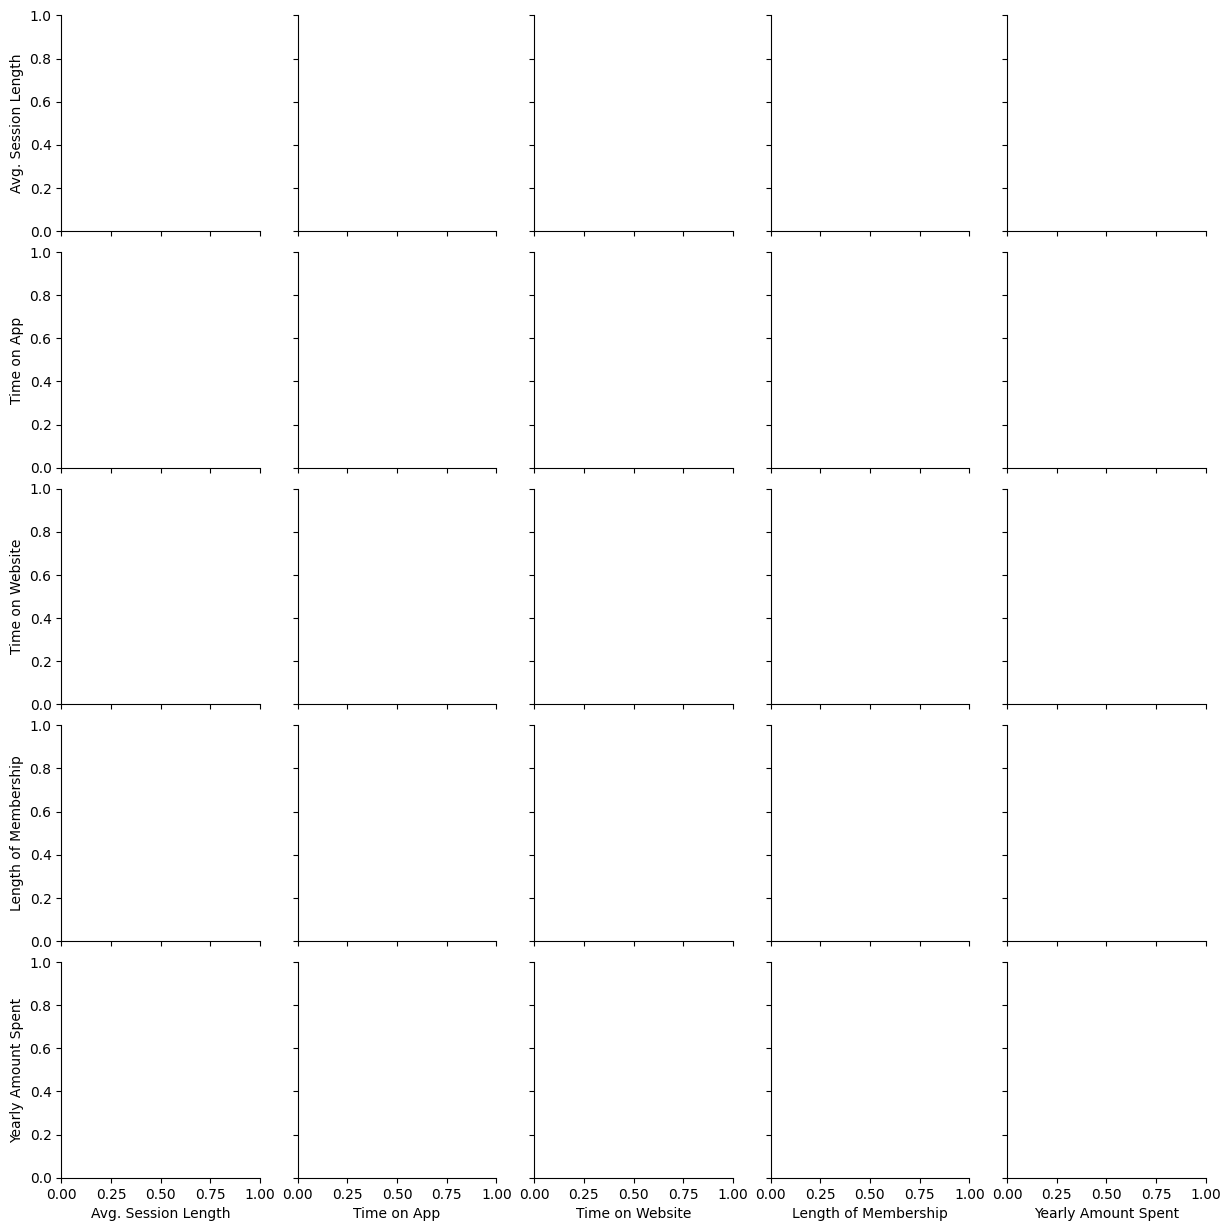

In [17]:
sns.PairGrid(customers)

#Length of Membership

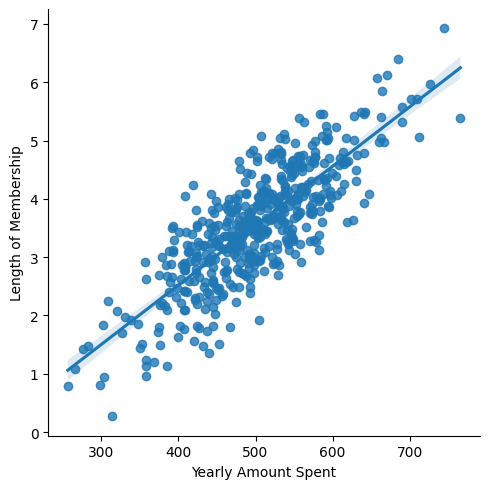

In [18]:
sns.lmplot(x='Yearly Amount Spent',y ='Length of Membership', data=customers)

Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. ** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [19]:
y = customers['Yearly Amount Spent']

In [20]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Training the Model
Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [23]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named lm.



In [24]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [25]:
lm.fit(X_train,y_train)

LinearRegression()

In [26]:


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

LinearRegression(n_jobs=1)

Print out the coefficients of the model

Regression coefficients are estimations of unknown parameters that describe the connection between a predictor variable and its associated response.

In other words, regression coefficients are used to estimate the value of an unknown variable based on a known variable. 

In [27]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


Predicting Test Data


Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [28]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

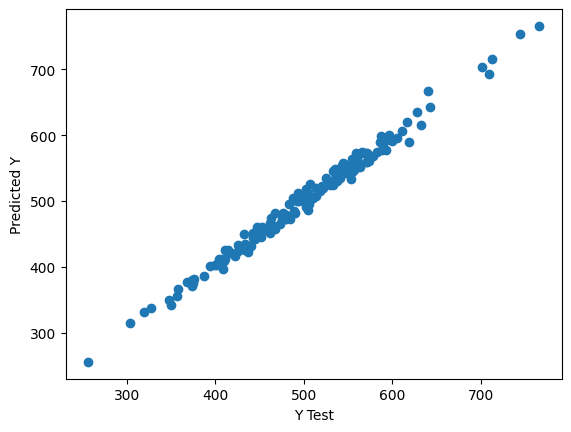

In [29]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. **

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 7.228148653430826


In [32]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE: 79.81305165097427
RMSE: 8.933815066978624


Residuals

Let's quickly explore the residuals to make sure everything was okay with our data.
Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

C:\Users\nisha\AppData\Local\Temp\ipykernel_25088\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


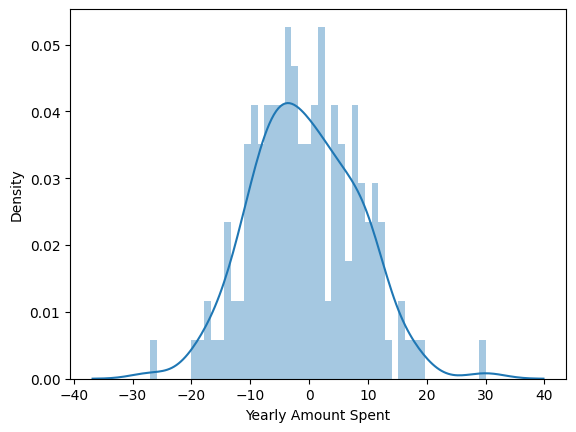

In [33]:
sns.distplot((y_test-predictions),bins=50);

Conclusion

We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **



In [34]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
